In [209]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
df=pd.read_csv('Employee_Salaries_-_2024.csv')

In [211]:
df.head(10)


,Department,Department Name,Division,Gender,Base Salary,2024 Overtime Pay,2024 Longevity Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 IT Administration,M,169555.00,0.00,0.00,M3
1,CUS,Community Use of Public Facilities,CUS 70 Finance and Administrative Support Team,F,141876.93,0.00,0.00,M3
2,DGS,Department of General Services,DGS 36 Fleet Management Services,F,87523.00,748.37,2701.48,16
3,CEX,Offices of the County Executive,CEX 15 Chief Administrative Officer's Office,F,207000.00,0.00,0.00,EX2
4,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,F,91392.00,0.00,5733.27,N17
5,OAG,Office of Agriculture,OAG 78 Agricultural Services,F,108899.00,0.00,3361.18,N21
6,COR,Correction and Rehabilitation,COR 42 MSD Fiscal Services,F,160088.68,0.00,0.00,M3
7,HHS,Department of Health and Human Services,HHS 60 Public Health Services Division,F,130181.00,0.00,8166.53,N25
8,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,F,104197.00,0.00,3216.00,20
9,DGS,Department of General Services,DGS 36 Real Estate Office,F,169555.00,0.00,0.00,M3


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          10398 non-null  object 
 1   Department Name     10398 non-null  object 
 2   Division            10398 non-null  object 
 3   Gender              10398 non-null  object 
 4   Base Salary         10398 non-null  float64
 5   2024 Overtime Pay   10398 non-null  float64
 6   2024 Longevity Pay  10398 non-null  float64
 7   Grade               10376 non-null  object 
dtypes: float64(3), object(5)
memory usage: 650.0+ KB


In [213]:
# let's check missing values of grade
print(df.isnull().sum())

Department             0
Department Name        0
Division               0
Gender                 0
Base Salary            0
2024 Overtime Pay      0
2024 Longevity Pay     0
Grade                 22
dtype: int64


In [214]:
df.shape

(10398, 8)

In [215]:
df['Grade'].value_counts()

Grade
T1     723
16     672
24     571
P4     571
F3     519
      ... 
N12      1
EX0      1
MD2      1
N36      1
F2P      1
Name: count, Length: 100, dtype: int64

In [216]:
#either I can drop or replace it with a value so later it help in analysis

df['Grade'].fillna('Unknown',inplace=True)

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_18036\3728034323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Grade'].fillna('Unknown',inplace=True)


In [217]:
print(df['Grade'].isnull().sum())

0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          10398 non-null  object 
 1   Department Name     10398 non-null  object 
 2   Division            10398 non-null  object 
 3   Gender              10398 non-null  object 
 4   Base Salary         10398 non-null  float64
 5   2024 Overtime Pay   10398 non-null  float64
 6   2024 Longevity Pay  10398 non-null  float64
 7   Grade               10398 non-null  object 
dtypes: float64(3), object(5)
memory usage: 650.0+ KB


In [219]:
categorical_columns=[var for var in df.columns if df[var].dtypes =='O']
categorical_columns



['Department', 'Department Name', 'Division', 'Gender', 'Grade']

In [220]:
numerical_columns=[var for var in df.columns if df[var].dtypes!='O']
numerical_columns


['Base Salary', '2024 Overtime Pay', '2024 Longevity Pay']

In [221]:
df['Total_Pay']=df['Base Salary']+df['2024 Overtime Pay']+df['2024 Longevity Pay']

In [222]:
df.head()

,Department,Department Name,Division,Gender,Base Salary,2024 Overtime Pay,2024 Longevity Pay,Grade,Total_Pay
0,ABS,Alcohol Beverage Services,ABS 85 IT Administration,M,169555.00,0.00,0.00,M3,169555.00
1,CUS,Community Use of Public Facilities,CUS 70 Finance and Administrative Support Team,F,141876.93,0.00,0.00,M3,141876.93
2,DGS,Department of General Services,DGS 36 Fleet Management Services,F,87523.00,748.37,2701.48,16,90972.85
3,CEX,Offices of the County Executive,CEX 15 Chief Administrative Officer's Office,F,207000.00,0.00,0.00,EX2,207000.00
4,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,F,91392.00,0.00,5733.27,N17,97125.27


In [223]:
df=df.drop('Base Salary',axis=1)
df=df.drop('2024 Overtime Pay',axis=1)
df=df.drop('2024 Longevity Pay',axis=1)

In [224]:
df.head()

,Department,Department Name,Division,Gender,Grade,Total_Pay
0,ABS,Alcohol Beverage Services,ABS 85 IT Administration,M,M3,169555.00
1,CUS,Community Use of Public Facilities,CUS 70 Finance and Administrative Support Team,F,M3,141876.93
2,DGS,Department of General Services,DGS 36 Fleet Management Services,F,16,90972.85
3,CEX,Offices of the County Executive,CEX 15 Chief Administrative Officer's Office,F,EX2,207000.00
4,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,F,N17,97125.27


In [225]:
# lets convert gender using apply method ,f=1 and m=0

df['Gender']=df['Gender'].apply(lambda x:1 if x=='F' else 0)

In [226]:
df.head()

,Department,Department Name,Division,Gender,Grade,Total_Pay
0,ABS,Alcohol Beverage Services,ABS 85 IT Administration,0,M3,169555.00
1,CUS,Community Use of Public Facilities,CUS 70 Finance and Administrative Support Team,1,M3,141876.93
2,DGS,Department of General Services,DGS 36 Fleet Management Services,1,16,90972.85
3,CEX,Offices of the County Executive,CEX 15 Chief Administrative Officer's Office,1,EX2,207000.00
4,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,1,N17,97125.27


<Axes: xlabel='Total_Pay', ylabel='Count'>

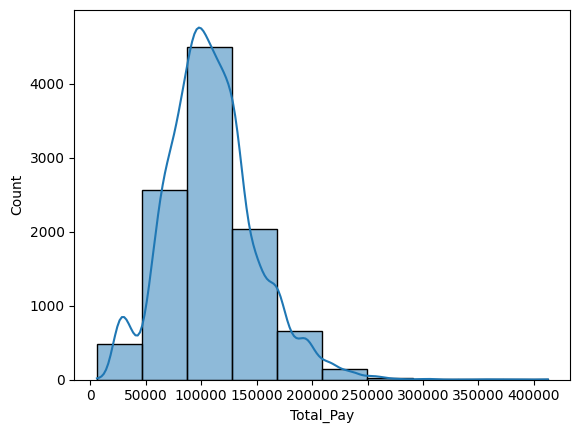

In [227]:
sns.histplot(df['Total_Pay'],bins=10,kde=True)

In [228]:
df['Total_Pay'].describe()

count     10398.000000
mean     108676.113847
std       40044.269975
min        5947.050000
25%       82584.392500
50%      105633.375000
75%      130181.000000
max      412649.740000
Name: Total_Pay, dtype: float64

In [229]:
print(df['Total_Pay'].mean())
print(df['Total_Pay'].median())
print(df['Total_Pay'].mode())

108676.11384689363
105633.375
0    130181.0
Name: Total_Pay, dtype: float64


<Axes: xlabel='Total_Pay'>

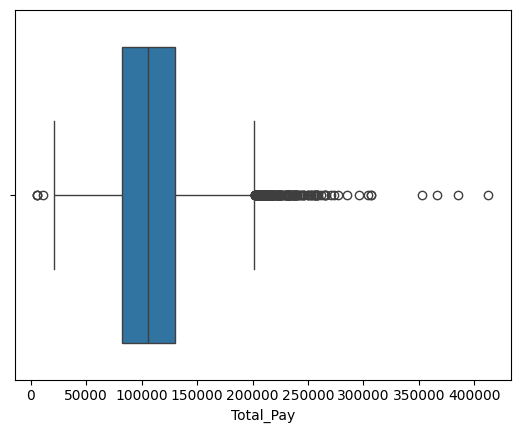

In [230]:
#clearly there is an outlier 
# mean > median :positive skewed distribution

sns.boxplot(x=df['Total_Pay'])

In [231]:
#even boxplot box it has huge outliers
# right skewed data we can apply log transformation 

df['Total_Pay'] = np.log1p(df['Total_Pay']) 


In [232]:
df.head()

,Department,Department Name,Division,Gender,Grade,Total_Pay
0,ABS,Alcohol Beverage Services,ABS 85 IT Administration,0,M3,12.040939
1,CUS,Community Use of Public Facilities,CUS 70 Finance and Administrative Support Team,1,M3,11.862722
2,DGS,Department of General Services,DGS 36 Fleet Management Services,1,16,11.418327
3,CEX,Offices of the County Executive,CEX 15 Chief Administrative Officer's Office,1,EX2,12.240479
4,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,1,N17,11.483767


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'ABS'),
  Text(1, 0, 'CUS'),
  Text(2, 0, 'DGS'),
  Text(3, 0, 'CEX'),
  Text(4, 0, 'HHS'),
  Text(5, 0, 'OAG'),
  Text(6, 0, 'COR'),
  Text(7, 0, 'DOT'),
  Text(8, 0, 'SHF'),
  Text(9, 0, 'TBS'),
  Text(10, 0, 'OHR'),
  Text(11, 0, 'IGR'),
  Text(12, 0, 'FIN'),
  Text(13, 0, 'POL'),
  Text(14, 0, 'DEP'),
  Text(15, 0, 'BOA'),
  Text(16, 0, 'HCA'),
  Text(17, 0, 'OMB'),
  Text(18, 0, 'DPS'),
  Text(19, 0, 'PRO'),
  Text(20, 0, 'FRS'),
  Text(21, 0, 'CEC'),
  Text(22, 0, 'LIB'),
  Text(23, 0, 'REC'),
  Text(24, 0, 'HRC'),
  Text(25, 0, 'OIG'),
  Text(26, 0, 'OLR'),
  Text(27, 0, 'OCP'),
  Text(28, 0, 'OAS'),
  Text(29, 0, 'OLO'),
  Text(30, 0, 'ORE'),
  Text(31, 0, 'DHS'),
  Text(32, 0, 'BOE'),
  Text(33, 0, 'CAT'),
  Text(34, 0, 'NDA'

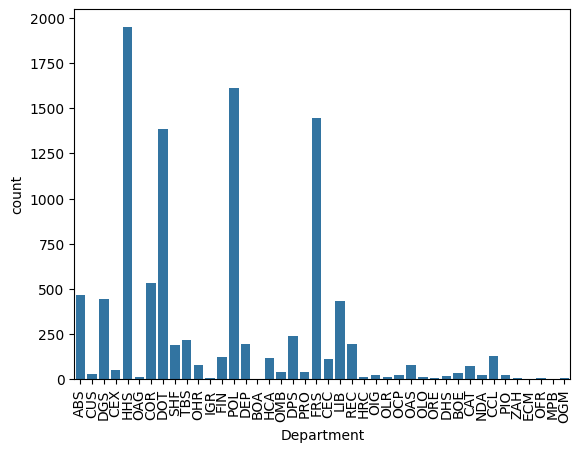

In [233]:
sns.countplot(x='Department', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='count'>

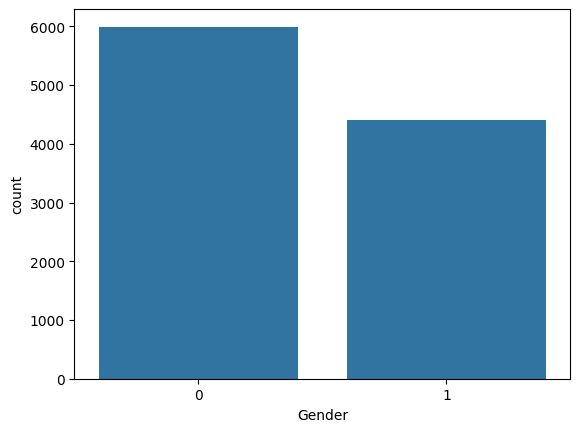

In [234]:
sns.countplot(x='Gender',data=df)

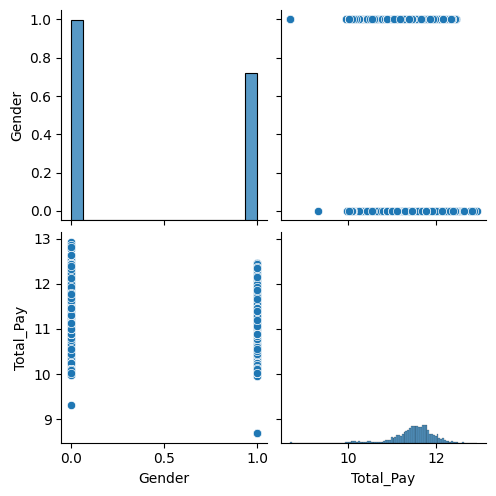

In [235]:
sns.pairplot(data=df)

<Axes: xlabel='Total_Pay', ylabel='Count'>

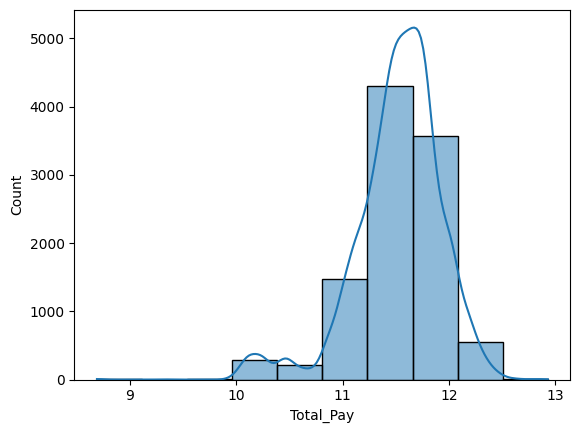

In [236]:
sns.histplot(df['Total_Pay'],bins=10,kde=True)

In [237]:
print(df['Total_Pay'].mean())
print(df['Total_Pay'].median())
print(df['Total_Pay'].mode())

11.520022446760823
11.567739117991504
0    11.776689
Name: Total_Pay, dtype: float64


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10398 non-null  object 
 1   Department Name  10398 non-null  object 
 2   Division         10398 non-null  object 
 3   Gender           10398 non-null  int64  
 4   Grade            10398 non-null  object 
 5   Total_Pay        10398 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 487.5+ KB


In [239]:
df.describe()

,Gender,Total_Pay
count,10398.000000,10398.000000
mean,0.423639,11.520022
std,0.494158,0.414662
min,0.000000,8.690819
25%,0.000000,11.321588
50%,0.000000,11.567739
75%,1.000000,11.776689
max,1.000000,12.930357


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Select features
X = df[['Department', 'Division', 'Gender', 'Grade']]
y = df['Total_Pay']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.14024494824430378
MSE: 0.04231334590979984
RMSE: 0.20570208047027586
R² Score: 0.7742467688639489
